Gradient Descent in 1D

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-5-148c0f20c5da>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [6]:
def fx(x):
  return 3*x**2 - 3*x + 4
def deriv(x):
  return 6*x - 3

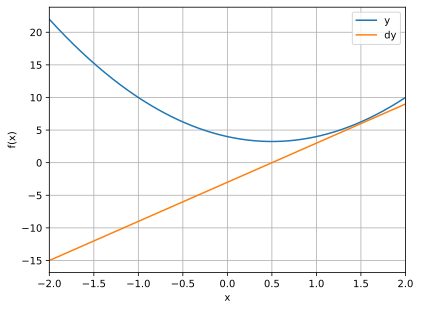

In [7]:
x = np.linspace(-2,2,2001)
plt.plot(x,fx(x),x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])

In [8]:
localmin = np.random.choice(x,1)

learning_rate = .01
training_epochs = 100
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
localmin

array([0.50085072])

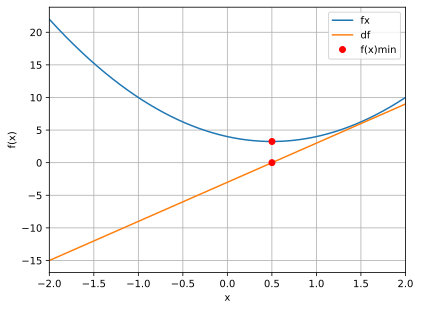

In [9]:
plt.plot(x,fx(x),x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['fx','df','f(x)min'])


In [10]:
localmin = np.random.choice(x,1)[0]
learning_rate = 0.01
training_epochs = 100
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = [localmin,grad]

Text(0, 0.5, 'Derivative')

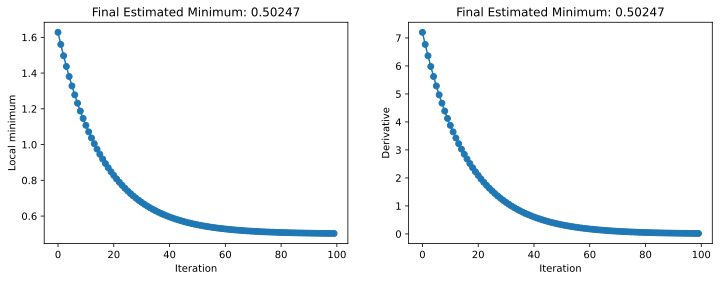

In [11]:
fig,ax = plt.subplots(1,2,figsize = (12,4))
for i, ylabel in enumerate(["Local minimum", "Derivative"]):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final Estimated Minimum: {localmin:.5f}')
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

# Gradient Descent 2D

In [12]:
import sympy as sym

In [13]:
def peaks(z,y):
  z,y = np.meshgrid(z,y)
  t = 3*(1-z)**2*np.exp(1-(z**2)-(y+1)**2)\
      -10*(z/5-z**3-y**5)* np.exp(-z**2-y**2)\
      - 1/3*np.exp(1-(z+1)**2 -y**2)
  return t

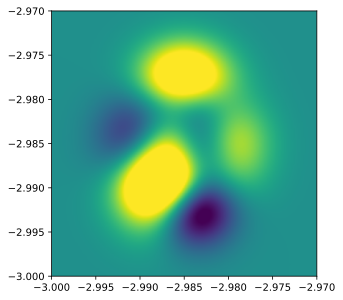

In [15]:
z = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)
T = peaks(z,y)
plt.imshow(T,extent=[z[0],z[1],y[0],y[1],],vmin=-5,vmax= 5,origin='lower')


In [18]:
sz,sy = sym.symbols('sz,sy')
sT = 3*(1-sz)**2*sym.exp(1-(sz**2)-(sy+1)**2)\
      -10*(sz/5-sz**3-sy**5)* sym.exp(-sz**2-sy**2)\
      - 1/3*sym.exp(1-(sz+1)**2 -sy**2)
df_z = sym.lambdify((sz,sy),sym.diff(sT,sz),'sympy')
df_y = sym.lambdify((sz,sy),sym.diff(sT,sy),'sympy')
df_z(1,1).evalf()

-1.05826141404126

In [21]:
localmin= np.random.rand(2)*4-2
startpnt =localmin[:]
learning_rate = .01
training_rate = 1000

trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([df_z(localmin[0],localmin[1]).evalf(),
                   df_y(localmin[0],localmin[1]).evalf()
                   ])
  localmin = localmin - learning_rate*grad
  trajectory[i,:] = localmin

print(localmin)
print(startpnt)

[0.444079400300232 -1.64823210787370]
[ 1.1640756  -0.99479953]


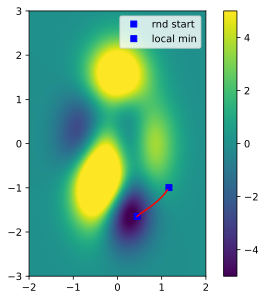

In [22]:
plt.imshow(T,extent=[x[0],x[-1],y[0],y[-1]],vmin =-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'bs')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()